In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


Training a Classifier
=====================
About data:

For vision, a package called ``torchvision``, 
that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc.

For this experiment， I use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. 

The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.





Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
I transform them to Tensors of normalized range [-1, 1].



In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Lets see some of the training dataset images.



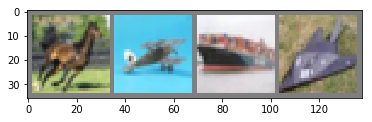

horse plane  ship plane


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Create a 2 convolution layers (conv) and 3 Fully connected layers (Fc)



In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input image channel, 6 output channels, 5x5 square convolution kernel
        self.pool = nn.MaxPool2d(2, 2)   # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #3 Fully connected layers (Fc)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)           #(len(x[0]),len(x))#(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 Classification Cross-Entropy loss and SGD with a Lerarning rate = 0.001.



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


4. Train the network
^^^^^^^^^^^^^^^^^^^^

I simply have to loop over our training dataset (batches), 
and feed the inputs to the network and optimize the weights.



In [0]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))                                                                                  
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.111
[1,  4000] loss: 1.154
[1,  6000] loss: 1.134
[1,  8000] loss: 1.129
[1, 10000] loss: 1.127
[1, 12000] loss: 1.103
[2,  2000] loss: 1.029
[2,  4000] loss: 1.068
[2,  6000] loss: 1.072
[2,  8000] loss: 1.076
[2, 10000] loss: 1.048
[2, 12000] loss: 1.044
[3,  2000] loss: 0.970
[3,  4000] loss: 0.987
[3,  6000] loss: 0.991
[3,  8000] loss: 1.009
[3, 10000] loss: 1.024
[3, 12000] loss: 0.984
[4,  2000] loss: 0.917
[4,  4000] loss: 0.948
[4,  6000] loss: 0.935
[4,  8000] loss: 0.955
[4, 10000] loss: 0.962
[4, 12000] loss: 0.972
[5,  2000] loss: 0.863
[5,  4000] loss: 0.888
[5,  6000] loss: 0.914
[5,  8000] loss: 0.924
[5, 10000] loss: 0.897
[5, 12000] loss: 0.932
[6,  2000] loss: 0.836
[6,  4000] loss: 0.839
[6,  6000] loss: 0.859
[6,  8000] loss: 0.891
[6, 10000] loss: 0.890
[6, 12000] loss: 0.916
[7,  2000] loss: 0.775
[7,  4000] loss: 0.814
[7,  6000] loss: 0.860
[7,  8000] loss: 0.839
[7, 10000] loss: 0.862
[7, 12000] loss: 0.884
[8,  2000] loss: 0.770
[8,  4000] 

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

After 50 passes over the training dataset. I need to check if the network 
is learning.

I will check this by predicting the class label that the neural network
outputs, and checking it against the actual labels of the test set.

Okay, first step. Let us display an image from the test set to get familiar.


The outputs are energies (probabilities) for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.



The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 48 %
Accuracy of   car : 68 %
Accuracy of  bird : 49 %
Accuracy of   cat : 48 %
Accuracy of  deer : 49 %
Accuracy of   dog : 39 %
Accuracy of  frog : 64 %
Accuracy of horse : 63 %
Accuracy of  ship : 74 %
Accuracy of truck : 73 %
